In [12]:
import matplotlib
import pandas as pd
import seaborn as sbn

In [13]:
%matplotlib inline

In [2]:
recipes_data_df = pd.read_csv('out/recipes_data.csv')

In [3]:
recipes_ml_df = pd.read_csv('out/recipes_ml.csv')

In [4]:
X = recipes_ml_df
y = recipes_data_df.year

In [5]:
recipes_df = pd.concat([recipes_data_df, recipes_ml_df], axis=1)

In [6]:
means_by_year_df = recipes_df.groupby('year')['num_ingredients', 'num_techniques', 'num_preparations'].mean()

In [7]:
means_by_year_df

,num_ingredients,num_techniques,num_preparations
year,,,
1987,21.333333,32.933333,7.000000
1988,22.538462,31.692308,6.153846
1989,20.535714,30.428571,6.321429
1990,22.062500,31.656250,6.812500
1991,23.877193,34.035088,8.017544
1992,21.026316,31.078947,6.736842
1993,21.666667,32.600000,6.533333
1994,17.433333,28.416667,5.950000
1995,19.431373,33.686275,6.470588


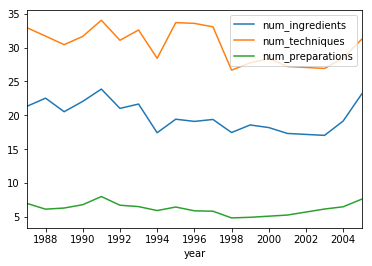

In [14]:
means_by_year_df.plot();

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)

In [8]:
def my_score(f, xs, ys):
    assert(len(xs) == len(ys))
    a = 18
    b = sum(abs(x - y) for x, y in zip(xs, ys)) / len(xs)
    return (f(a) - f(b)) / f(a)

def my_linear_score(xs, ys):
    return my_score(lambda x: x, xs, ys)

In [9]:
clf = RandomForestClassifier(**{'class_weight': None,
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 100,
 'n_jobs': -1,
 'random_state': 0,
 'warm_start': True})

In [10]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=True)

In [11]:
y_pred = clf.predict(X_test)

In [12]:
my_linear_score(y_pred, y_test)

0.94307832422586513

In [13]:
features_df = pd.DataFrame(
    [X.columns, clf.feature_importances_],
    index=['feature', 'importance']
).T

In [14]:
len(clf.feature_importances_)

2737

In [15]:
features_df.sort_values('importance', ascending=False).head(10)

,feature,importance
3,num_techniques,0.0132332
5,num_worlds,0.0132191
0,num_ingredients,0.0126246
4,num_techniquesR,0.0122363
2736,w_SALADO,0.00983503
1,num_preparations,0.00942976
2684,t_horno,0.00745607
2334,pf_SALSAS,0.00743707
2487,t_guardar,0.00682988
2,num_styles,0.00674511


Conclusions:<br>
The 6 metrics (num_\*) are in the top 10 of important features: rank 1, 2, 3, 4, 6, and 10

In [16]:
# Top 20 techniques
c = 0
for i, x in features_df.sort_values('importance', ascending=False).iterrows():
    if x.feature.startswith('t_'):
        print(c, x.feature)
        c += 1
        if c >= 20:
            break

0 t_horno
1 t_guardar
2 t_hervir
3 t_remover
4 t_terminar
5 t_agua
6 t_introducir
7 t_cocer
8 t_juntar
9 t_cocinar
10 t_calentar
11 t_retirar
12 t_enfriar
13 t_añadir
14 t_colocar
15 t_triturar
16 t_obtener
17 t_dejar
18 t_servir
19 t_pasar


In [17]:
# Top 20 ingredients
c = 0
for i, x in features_df.sort_values('importance', ascending=False).iterrows():
    if x.feature.startswith('i_'):
        print(c, x.feature)
        c += 1
        if c >= 20:
            break

0 i_agar
1 i_azúcar
2 i_hoja de gelatina
3 i_agua
4 i_sal
5 i_perifollo
6 i_agar-agar en polvo
7 i_sal maldon
8 i_nata líquida
9 i_aceite de oliva
10 i_nata
11 i_glucosa
12 i_aceite de girasol
13 i_aceite
14 i_mantequilla
15 i_yemas de huevo
16 i_claras de huevo
17 i_gelatina
18 i_limón
19 i_isomalt


In [21]:
recipes_df = pd.concat([recipes_data_df, recipes_ml_df], axis=1)

In [22]:
recipes_df.head()

,title,year,num_ingredients,num_preparations,num_styles,num_techniques,num_techniquesR,num_worlds,i_chocolate troceado,i_pizza,...,temp_CALIENTE/FRÍA,temp_HELADA/FRÍA,temp_TIBIA/CALIENTE,temp_FRÍA/HELADA,temp_CALIENTE/HELADA,temp_TIBIA,temp_HELADA/FRÍA/AMBIENTE,temp_TIBIA/AMBIENTE,w_DULCE,w_SALADO
0,terrina de melón con gelée de oporto,1987,7,4,1,17,0,2,0,0,...,0,0,0,0,0,0,0,0,0,2
1,mousse de trufa negra '87,1987,15,5,0,22,0,2,0,0,...,0,0,0,0,0,0,0,0,0,2
2,"ensalada de pasta fresca con caviar, tempura d...",1987,21,5,0,29,0,4,0,0,...,0,0,0,0,0,0,0,0,0,4
3,"raviolis de cigala, patatas y trufa negra",1987,30,10,1,56,0,3,0,0,...,0,0,0,0,0,0,0,0,0,3
4,tempura de flor de calabacín rellena de mozzar...,1987,25,7,1,37,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
sum(recipes_df[recipes_df.year==1987].num_preparations)/15

7.0

In [30]:
means_by_year_df = recipes_df.groupby('year')['num_ingredients', 'num_techniques', 'num_preparations'].mean()

In [31]:
means_by_year_df

,num_ingredients,num_techniques,num_preparations
year,,,
1987,21.333333,32.933333,7.000000
1988,22.538462,31.692308,6.153846
1989,20.535714,30.428571,6.321429
1990,22.062500,31.656250,6.812500
1991,23.877193,34.035088,8.017544
1992,21.026316,31.078947,6.736842
1993,21.666667,32.600000,6.533333
1994,17.433333,28.416667,5.950000
1995,19.431373,33.686275,6.470588


In [38]:
means_by_year_df.plot()

ImportError: No module named 'matplotlib'